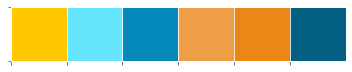

In [6]:
import pandas as pd
import numpy as np
import datetime
from bokeh.models import HoverTool
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

_email = '''
light orange: #FFC800
med turq: #66e5ff
blue: #0588BA
dark orange: #ED9E46
dark rich orange: #eb8717
dark blue: #046083
'''
# bgcolor / medium blue: #45AFDC
# medium-dark blue: #1D98C7

def _parse_colors(text):
    return [x.split(':')[-1].strip() for x in text.splitlines() if x.strip()]

COLORS = _parse_colors(_email)
PALETTE = sns.color_palette(COLORS)
sns.palplot(PALETTE)

_alt_colors = '''
dark orange: #ED9E46
blue: #0588BA
light orange: #FFC800
med turq: #66e5ff
dark rich orange: #eb8717
dark blue: #046083
'''
ALT_COLORS = _parse_colors(_alt_colors)


def m_swarmplot(*a, **kw):
    kw.setdefault('palette', PALETTE)
    kw.setdefault('size', 14)
    ret = sns.swarmplot(*a, **kw)
    ret.set_facecolor('#00000000')
    ret.set_facecolor('#45AFDC00')
    return ret

def m_pieplot(df, *a, **kw):
    kw.setdefault('y', 'name')
    kw.setdefault('counterclock', True)
    kw.setdefault('legend', False)
    kw.setdefault('autopct', '%1.0f%%')
    kw.setdefault('pctdistance', 1.1)
    kw.setdefault('labeldistance', 1.25)
    kw.setdefault('radius', 1.2)
    kw.setdefault('figsize', (8, 8))
    kw.setdefault('colors', ALT_COLORS[::-1])
    kw.setdefault('textprops', {}).setdefault('fontsize', 20)
    pie = df.plot.pie(*a, **kw)
    return pie

In [7]:
apa_df = pd.read_csv(r"C:\Users\Maya's Machine\Documents\GitHub\awesome-python-applications\notebooks\apatite_export_20190817.csv")

In [69]:
#csv_df=apa_df.describe()

#from IPython.display import FileLink, FileLinks
#SAVE_PATH = './saved_data'
#from boltons.fileutils import mkdir_p
#mkdir_p(SAVE_PATH)

#csv_df.to_csv(SAVE_PATH + '/summary.csv', index=False)
# csv_df.to_excel('/path/to/data.xlsx', index=False)

#FileLinks(SAVE_PATH)

In [9]:
apa_df.rename(columns = {'sloc.TOTAL_lines':'sloc_TOTAL_lines',
                            'license.license_group': 'license_group',
                            'license.license': 'license_license',
                            'license.hereditary': 'license_hereditary',
                            'license.license': 'license',
                            'license.license_group': 'license_group',
                            'gh.forks': 'gh_forks',
                            'arch.compat.min_py2': 'py2',
                            'arch.compat.min_py3': 'py3',
                            'topic.primary_fq': 'topic_primary_fq',
                            'arch.dep.concurrency':'arch_dep_concurrency',
                            'arch.dep.gui_framework':'arch_dep_gui_framework',
                            'arch.dep.server_framework':'arch_dep_server_framework',
                            'arch.type':'arch_type',
                            'arch.pkg.container': 'pkg_container',
                            'arch.pkg.freezer': 'pkg_freezer',
                            'topic.primary': 'topic_primary',
                            'gh.size': 'gh_size',
                            'arch.dep.concurrency': 'arch_dep_concurrency',
                            'gh.stars': 'gh_stars',
                            'sloc.python_code': 'sloc_python_code',
                            'sloc.python_files': 'sloc_python_files',
                            'vcs.committer_count': 'vcs_committer_count',
                            'vcs.commit_count': 'vcs_commit_count',
                            'sloc.RATIO.python': 'sloc_RATIO_python',
                          'vcs.first_commit':'first_commit',
                          'vcs.latest_commit':'latest_commit',
                           'vcs.committer_percent_dist.10':'committer_percent_dist_10',
                            'vcs.committer_percent_dist.20':'committer_percent_dist_20',
                            'vcs.committer_percent_dist.30':'committer_percent_dist_30',
                            'vcs.committer_percent_dist.40':'committer_percent_dist_40',
                            'vcs.committer_percent_dist.50':'committer_percent_dist_50',
                            'vcs.committer_percent_dist.60':'committer_percent_dist_60',
                            'vcs.committer_percent_dist.70':'committer_percent_dist_70',
                            'vcs.committer_percent_dist.80':'committer_percent_dist_80',
                            'vcs.committer_percent_dist.90':'committer_percent_dist_90',
                            'vcs.committer_percent_dist.95':'committer_percent_dist_95',
                            'vcs.committer_percent_dist.99':'committer_percent_dist_99',
                            'vcs.committer_percent_dist.100':'committer_percent_dist_100'}, 
                 inplace=True)

In [10]:
def py23_compat(py2, py3):
    if not pd.isnull(py2) and not pd.isnull(py3):
        return 'py23'
    if pd.isnull(py2):
        return 'py3'
    return 'py2'

apa_df['py23_compat'] = apa_df[['py2','py3']].apply(lambda x: py23_compat(*x), axis=1)

In [11]:
apa_df['python_average'] = (apa_df.sloc_python_code / apa_df.sloc_python_files)

In [12]:
apa_df['vcs_first_commit']  = pd.to_datetime(apa_df['first_commit'])
apa_df['vcs_first_commit'] = pd.to_datetime(apa_df['first_commit']).dt.date
apa_df['vcs_latest_commit']  = pd.to_datetime(apa_df['latest_commit'])
apa_df['vcs_latest_commit'] = pd.to_datetime(apa_df['latest_commit']).dt.date

apa_df['age_commit'] =   pd.to_datetime(apa_df.latest_commit)-pd.to_datetime(apa_df.first_commit)
apa_df['age_commit'] / pd.Timedelta(1, unit='d')
apa_df['age_commit'].astype('timedelta64[D]')

0       795.0
1      3057.0
2      4591.0
3      5010.0
4      2108.0
        ...  
248    1814.0
249       NaN
250    4052.0
251       NaN
252       NaN
Name: age_commit, Length: 253, dtype: float64

In [13]:
apa_df.head()

,name,py2,py3,arch_dep_concurrency,arch_dep_gui_framework,arch_dep_server_framework,pkg_container,pkg_freezer,arch_type,gh_forks,...,vcs.minor_committer_counts.2,vcs.minor_committer_counts.3,vcs.minor_committer_counts.4,vcs.minor_committer_counts.5,vcs.vcs_name,py23_compat,python_average,vcs_first_commit,vcs_latest_commit,age_commit
0,archivebox,NaN,3.5,NaN,NaN,NaN,docker,NaN,desktop,291.0,...,31.0,34.0,38.0,41.0,git,py3,184.636364,2017-05-05,2019-07-09,795 days 09:02:42
1,canto,2.7,3.1,NaN,NaN,NaN,NaN,NaN,desktop,8.0,...,2.0,2.0,2.0,2.0,git,py23,130.137931,2010-03-19,2018-08-02,3057 days 19:55:13
2,deluge,2.7,NaN,twisted,NaN,zope,NaN,py2app,server,193.0,...,53.0,57.0,62.0,63.0,git,py2,177.875000,2006-11-28,2019-06-25,4591 days 17:29:11
3,gpodder,NaN,3.5,NaN,gtk,NaN,NaN,NaN,desktop,126.0,...,110.0,122.0,131.0,138.0,git,py3,176.214953,2005-11-21,2019-08-11,5010 days 20:11:59
4,kindleear,2.7,NaN,NaN,NaN,flask,NaN,NaN,server,577.0,...,12.0,12.0,13.0,13.0,git,py2,271.668317,2013-07-04,2019-04-13,2108 days 13:18:54


In [14]:
apa_df['age_commit'] = pd.to_numeric(apa_df['age_commit'].dt.days, downcast='integer')

In [15]:
#time df
time_df = apa_df.loc[:,['name', 'py23_compat', 'vcs_committer_count','license_hereditary', 'sloc_TOTAL_lines', 
                        'topic_primary', 'topic_primary_fq','license','gh_size', 'age_commit', 'sloc_RATIO_python',
                        'first_commit', 'latest_commit','committer_percent_dist_50', 'python_average', 
                        'license_group']]
time_df = time_df.dropna(subset=['first_commit'])


#concurrency df
concurrency_df = apa_df.loc[:,['name', 'arch_dep_concurrency','arch_type','gh_size', 'sloc_TOTAL_lines',
                                              'gh_stars', 'first_commit', 'latest_commit','age_commit']]
concurrency_df = concurrency_df.dropna()


#gui framework df
guiframework_df = apa_df.loc[:,['name', 'arch_dep_gui_framework','gh_size', 'arch_type',
                                              'gh_stars', 'first_commit', 'latest_commit','age_commit']]
guiframework_df = guiframework_df.dropna()


#server framework df
serverframework_df = apa_df.loc[:,['name','arch_dep_server_framework', 'arch_type', 'gh_size', 'arch_type', 
                                              'gh_stars', 'first_commit', 'latest_commit','age_commit']]
serverframework_df = serverframework_df.dropna()

#container package df
containerpkg_df = apa_df.loc[:,['name','pkg_container', 'first_commit']]
containerpkg_df = containerpkg_df.dropna()

#freezer package df
freezerpkg_df = apa_df.loc[:,['name','pkg_freezer', 'first_commit']]
freezerpkg_df = freezerpkg_df.dropna()


#stars df
stars_df = apa_df.loc[:,['name', 'sloc_TOTAL_lines', 'topic_primary', 'topic_primary_fq','vcs_committer_count',
                        'sloc_python_code','gh_stars', 'gh_forks']]
stars_df = stars_df.dropna()


#lines_df
lines_df = apa_df.loc[:,['name', 'sloc_TOTAL_lines','vcs_committer_count', 'sloc_python_code', 'license', 
                         'committer_percent_dist_50', 'age_commit', 'sloc_RATIO_python']]
lines_df = lines_df.dropna(subset=['sloc_TOTAL_lines'])


#license_df
license_df = apa_df.loc[:,['name', 'license_group', 'license_hereditary', 'topic_primary_fq']]
license_df = license_df.dropna()


#arch_df
arch_df = apa_df.loc[:,['name', 'arch_type', 'first_commit']]
arch_df = arch_df.dropna()


#py_df
py3_df = apa_df.loc[:,['name', 'py3']]
py3_df = py3_df.dropna()

In [16]:
#lines_df.sloc_TOTAL_lines.quantile([0.25,0.5,0.75])

In [17]:
def lines_size(x):
    if x <= 30501.0:
        return "Small"
    if x >= 168724.0:
        return "Large"
    return "Medium"

lines_df['size_TOTAL_lines'] = lines_df['sloc_TOTAL_lines'].apply(lines_size)

In [18]:
#time_df.dtypes

In [19]:
#moving on to time_df

In [20]:
#sorted_date = sorted(list(time_df['first_commit']))
#med = int(len(sorted_date)/2)
#sorted_date[med]

In [21]:
#sorted_date

In [22]:
corr_matrix = time_df.corr()
corr_matrix["sloc_TOTAL_lines"].sort_values(ascending=False)

sloc_TOTAL_lines             1.000000
gh_size                      0.484540
committer_percent_dist_50    0.277406
vcs_committer_count          0.192979
age_commit                   0.126942
python_average               0.021776
sloc_RATIO_python           -0.216321
Name: sloc_TOTAL_lines, dtype: float64

In [23]:
def committer_50(x):
    if x < 2.0:
        return "Yes"
    return "No"

time_df['committer_dist_50_percent'] = time_df['committer_percent_dist_50'].apply(committer_50)

Text(0, 0.5, '')

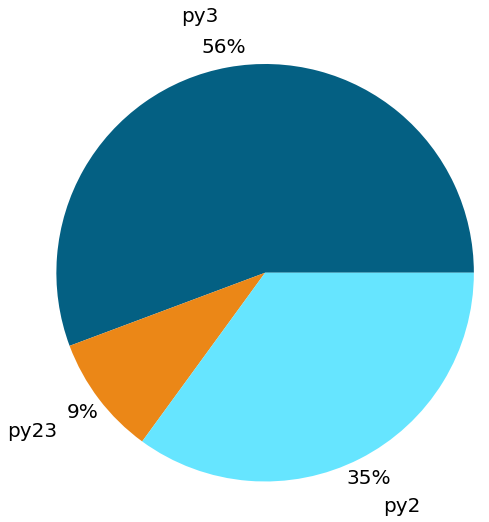

In [24]:
pie = m_pieplot(
    time_df
    .groupby('py23_compat')
    .count()
    .sort_values('py23_compat', ascending=False))
#plt.title("Figure 6: Dep Concurrency Breakdown", weight='bold', pad = 40, size=20)
plt.ylabel("")

Text(0, 0.5, 'Compatibility')

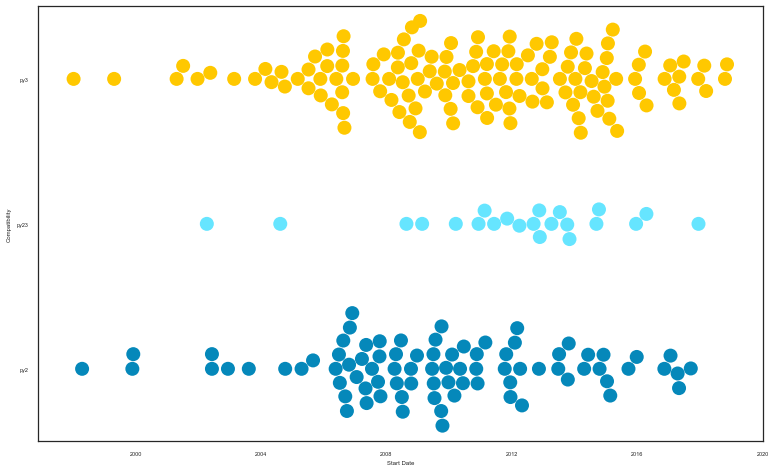

In [25]:
time_df['first_commit'] =  pd.to_datetime(time_df['first_commit'])

fig = plt.figure(figsize = (13, 8))
#plt.yticks(rotation=90)
sns.set(font_scale= .5)
sns.set_style("white")
ax = m_swarmplot(x="first_commit", y="py23_compat", data=time_df)
plt.xlabel("Start Date")
plt.ylabel("Compatibility")
#plt.title("Figure 3: Start Date / Python Compatibility", weight='bold')

c:\users\maya's machine\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Hereditary License')

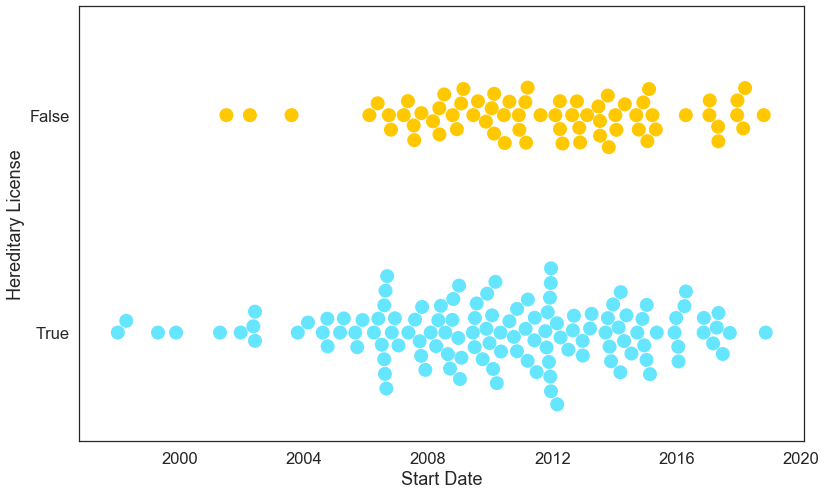

In [26]:
time_df['first_commit'] =  pd.to_datetime(time_df['first_commit'])
timelicense_df = time_df.dropna(subset=['license_hereditary'])
timelicense_df['license_hereditary'] = timelicense_df['license_hereditary'].astype(str)

fig = plt.figure(figsize = (13, 8))
#plt.yticks(rotation=90)
sns.set(font_scale=1.5)
sns.set_style("white")
ax = m_swarmplot(x="first_commit", y="license_hereditary", data=timelicense_df)
plt.xlabel("Start Date")
plt.ylabel("Hereditary License")
#plt.title("Figure 4: Start Date / Hereditary License", weight='bold')

Text(0, 0.5, 'Hereditary License')

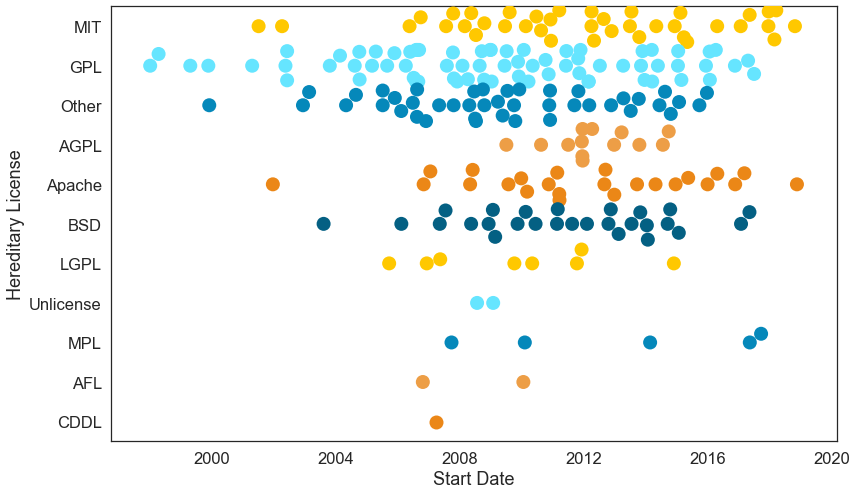

In [27]:
time_df['first_commit'] =  pd.to_datetime(time_df['first_commit'])
timelicense_df = time_df.dropna(subset=['license_group'])
timelicense_df['license_group'] = timelicense_df['license_group'].astype(str)

fig = plt.figure(figsize = (13, 8))
#plt.yticks(rotation=90)
sns.set(font_scale=1.5)
sns.set_style("white")
ax = m_swarmplot(x="first_commit", y="license_group", data=timelicense_df)
plt.xlabel("Start Date")
plt.ylabel("Hereditary License")
#plt.title("Figure 4: Start Date / Hereditary License", weight='bold')

In [28]:
#time_df

In [29]:
##moving on to concurrency_df

Text(0, 0.5, '')

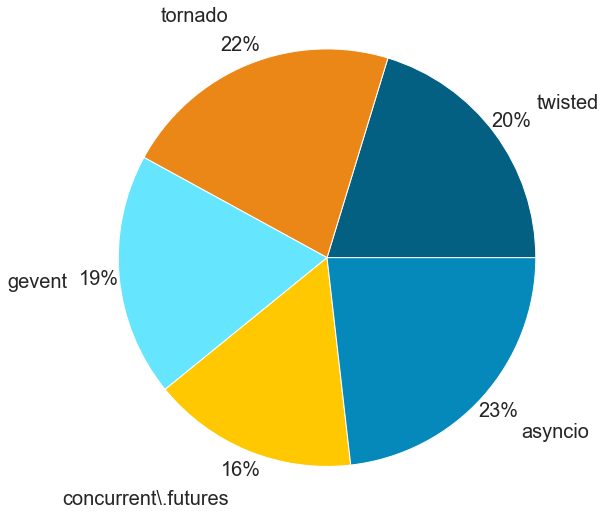

In [30]:
concurrency_df['first_commit'] = pd.to_datetime(concurrency_df['first_commit'])

pie = m_pieplot(
    concurrency_df
    .groupby('arch_dep_concurrency')
    .count()
    .sort_values('arch_dep_concurrency', ascending=False))
#plt.title("Figure 6: Dep Concurrency Breakdown", weight='bold', pad = 40, size=20)
plt.ylabel("")

Text(0, 0.5, 'Concurrency')

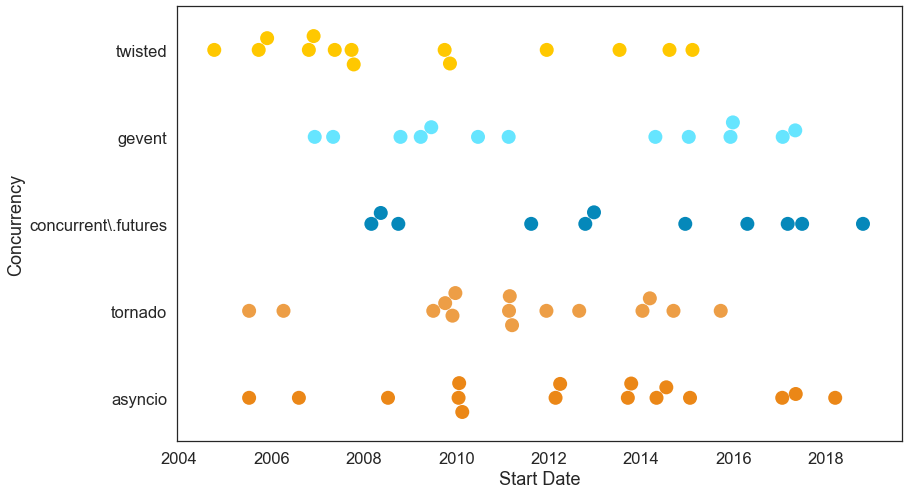

In [31]:
concurrency_df['first_commit'] =  pd.to_datetime(concurrency_df['first_commit'])

fig = plt.figure(figsize = (13, 8))
#plt.yticks(rotation=90)
sns.set(font_scale=1.5)
sns.set_style("white")
ax = m_swarmplot(x="first_commit", y="arch_dep_concurrency", data=concurrency_df)

plt.xlabel("Start Date")
plt.ylabel("Concurrency")
#plt.title("Figure 7: Start Date / Concurrency", weight='bold')

In [32]:
#moving on to guiframework_df

In [33]:
#guiframework_df.head()

Text(0, 0.5, '')

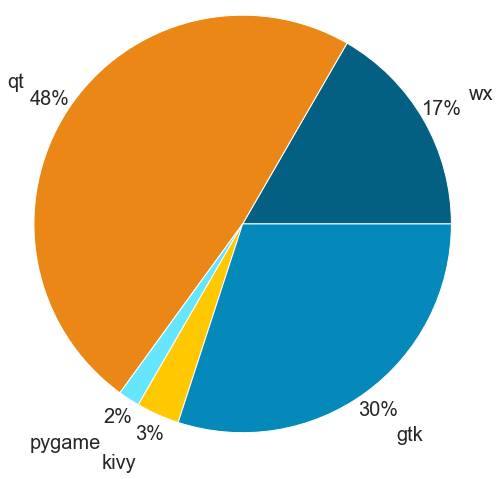

In [34]:
guiframework_df['first_commit'] =  pd.to_datetime(guiframework_df['first_commit'])

pie = m_pieplot(
    guiframework_df
    .groupby('arch_dep_gui_framework')
    .count()
    .sort_values('arch_dep_gui_framework', ascending=False))
#plt.title("Figure 8: Dep GUI Framework Breakdown", weight='bold', pad = 40, size=20)
plt.ylabel("")

Text(0, 0.5, 'GUI Framework')

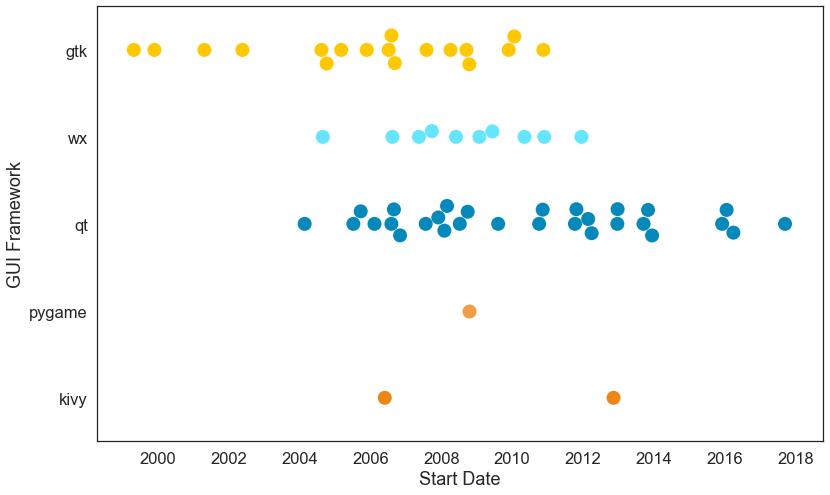

In [35]:
guiframework_df['first_commit'] =  pd.to_datetime(guiframework_df['first_commit'])

fig = plt.figure(figsize = (13, 8))
#plt.yticks(rotation=90)
sns.set(font_scale = 1.5)
sns.set_style("white")
ax = m_swarmplot(x="first_commit", y="arch_dep_gui_framework", data=guiframework_df)
plt.xlabel("Start Date")
plt.ylabel("GUI Framework")
#plt.title("Figure 9: Start Date / GUI Framework", weight='bold')

Text(0, 0.5, '')

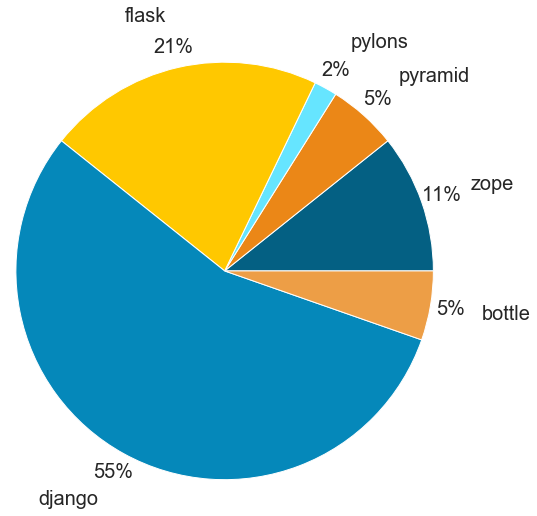

In [36]:
serverframework_df['first_commit'] =  pd.to_datetime(serverframework_df['first_commit'])

pie = m_pieplot(
    serverframework_df
    .groupby('arch_dep_server_framework')
    .count()
    .sort_values('arch_dep_server_framework', ascending=False))
#plt.title("Dep Server Framework Breakdown", weight='bold', pad = 50, size=20)
plt.ylabel("")

Text(0, 0.5, 'Server Framework')

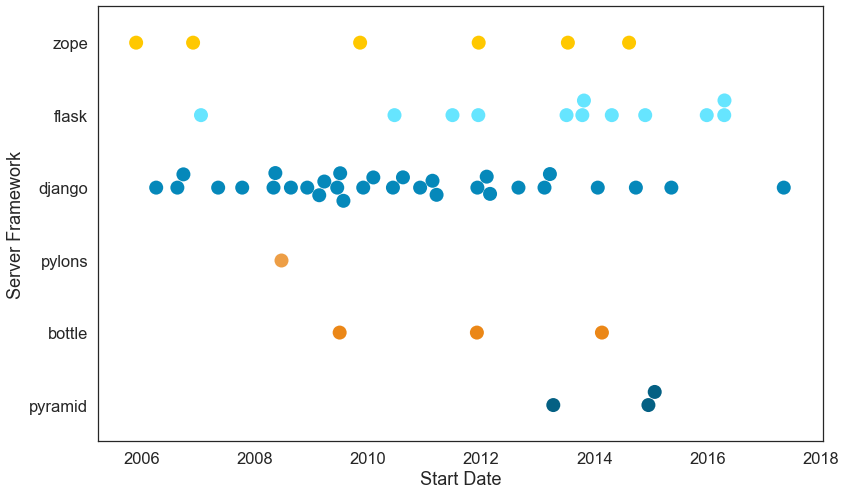

In [37]:
serverframework_df['first_commit'] = pd.to_datetime(serverframework_df['first_commit'])

fig = plt.figure(figsize = (13, 8))
sns.set(font_scale=1.5)
sns.set_style("white")
ax = m_swarmplot(x="first_commit", y="arch_dep_server_framework", data=serverframework_df)
plt.xlabel("Start Date")
plt.ylabel("Server Framework")
#plt.title("Start Date / Server Framework", weight='bold')

In [38]:
#move on to stars_df

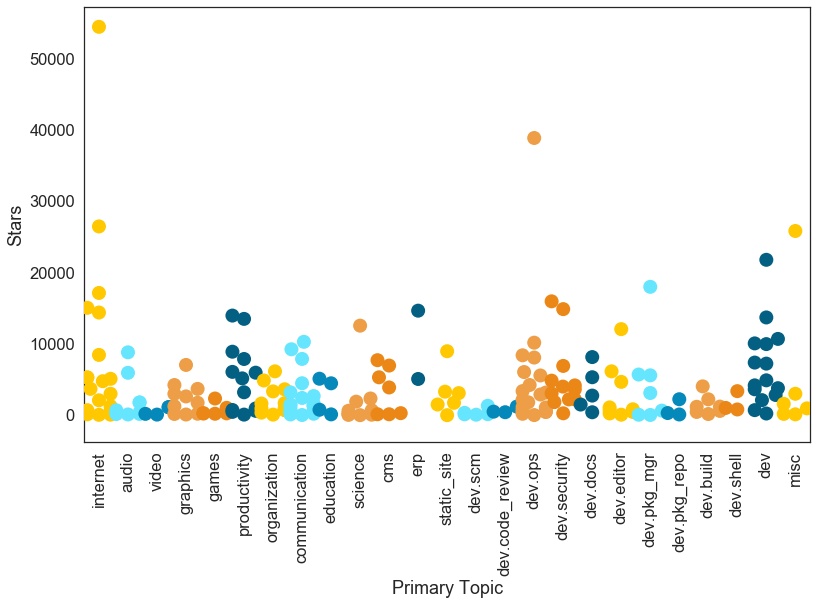

In [39]:
fig = plt.figure(figsize = (13, 8))
plt.xticks(rotation=90)
sns.set(font_scale=1.5)
sns.set_style("white")
ax = m_swarmplot(x="topic_primary_fq", y="gh_stars", data=stars_df)
plt.xlabel("Primary Topic")
plt.ylabel("Stars")
#plt.title("GitHub Stars / Primary Topic", weight='bold')

fig.set_facecolor('#45AFDC00')
ax.set_facecolor('#00000000')

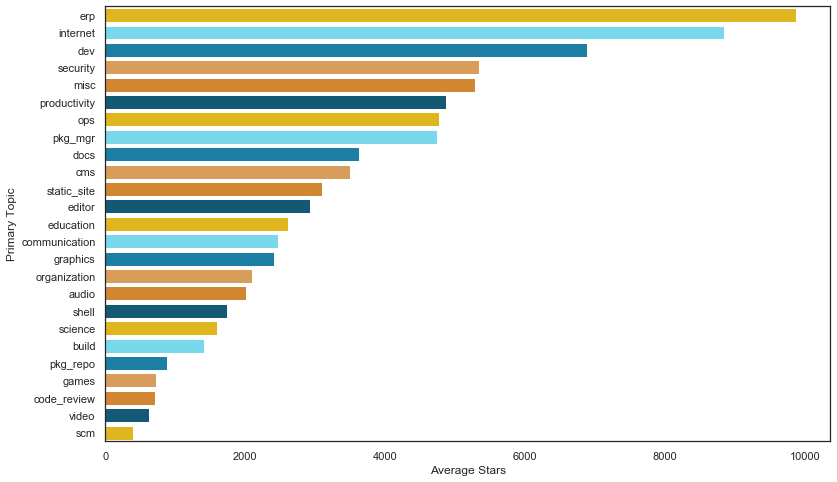

In [40]:
fig = plt.figure(figsize = (13, 8))
sns.set(font_scale = 1.5)
sns.set(style="white")
result = stars_df.groupby(["topic_primary"])['gh_stars'].aggregate(np.average).reset_index().sort_values('gh_stars')
ax = sns.barplot(x='gh_stars', y="topic_primary", data=stars_df, ci=None, 
                 order=result['topic_primary'][::-1], palette=PALETTE)
plt.xlabel("Average Stars")
plt.ylabel("Primary Topic")
#plt.title("Stars / Primary Topics", weight = 'bold')

fig.set_facecolor('#45AFDC00')
ax.set_facecolor('#00000000')

In [41]:
def is_topic_dev(x):
    return x.startswith("dev")

stars_df['is_dev'] = stars_df['topic_primary_fq'].apply(is_topic_dev)

In [42]:
#order_stars.value_counts().sort_values()

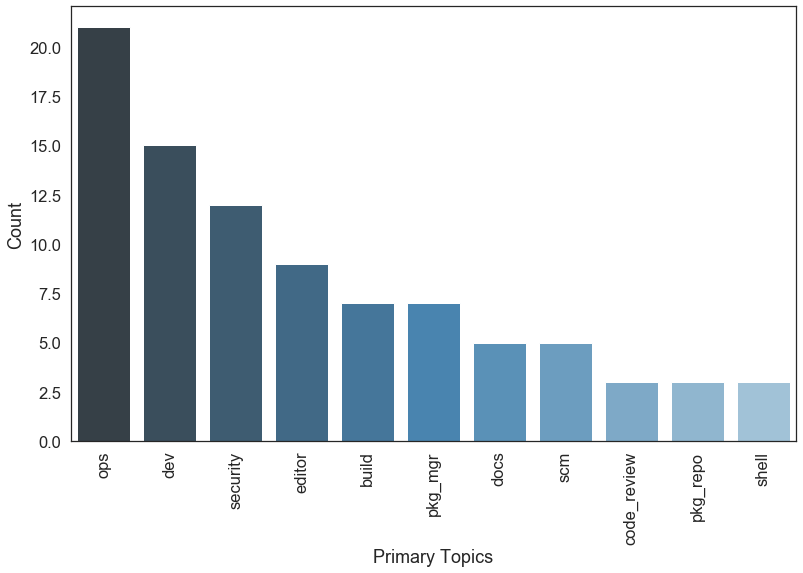

In [43]:
fig = plt.figure(figsize=(13,8))
sns.set(font_scale=1.5)
sns.set_style("white")

plt.xticks(rotation = 90)
order = list(stars_df[stars_df['is_dev']].groupby('topic_primary').count().sort_values('name', ascending=False)['name'].index)
result = sns.countplot(x='topic_primary', data=stars_df[stars_df['is_dev']], palette="Blues_d", order=order)
plt.xlabel("Primary Topics")
plt.ylabel("Count")
#plt.title("Developer Applications", weight="bold")

fig.set_facecolor('#45AFDC00')
ax.set_facecolor('#00000000')
 

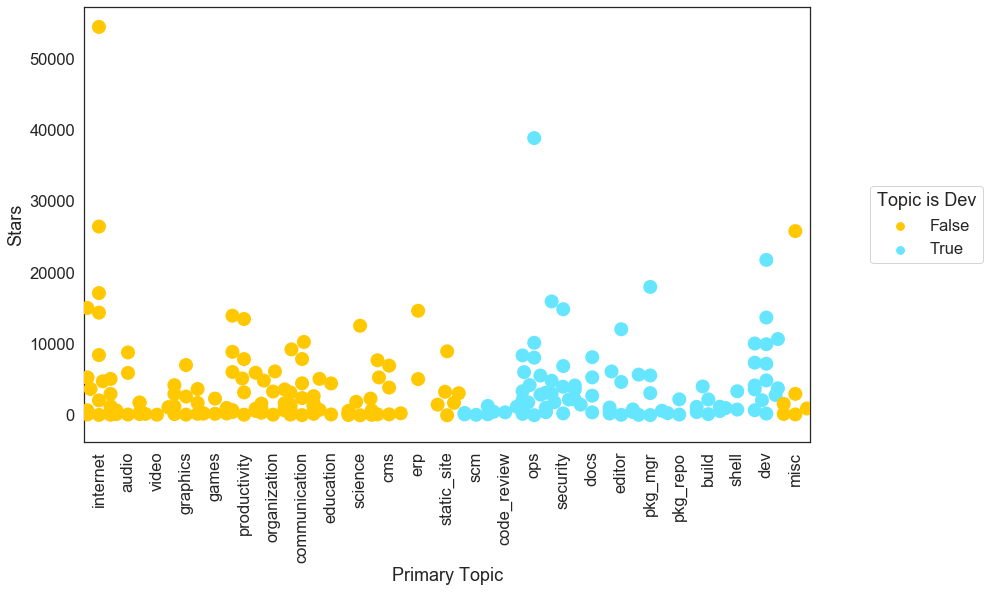

In [44]:
fig = plt.figure(figsize = (13, 8))
plt.xticks(rotation=90)
sns.set(font_scale = 1.5)
sns.set_style("white")
ax = m_swarmplot(x="topic_primary", y="gh_stars", hue = "is_dev", data=stars_df)

plt.xlabel("Primary Topic")
plt.ylabel("Stars")
#plt.title("GitHub Stars / Primary Topic", weight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
ax.legend(loc='center right', title="Topic is Dev", bbox_to_anchor=(1.25, 0.5), ncol=1)

fig.set_facecolor('#45AFDC00')
ax.set_facecolor('#00000000')

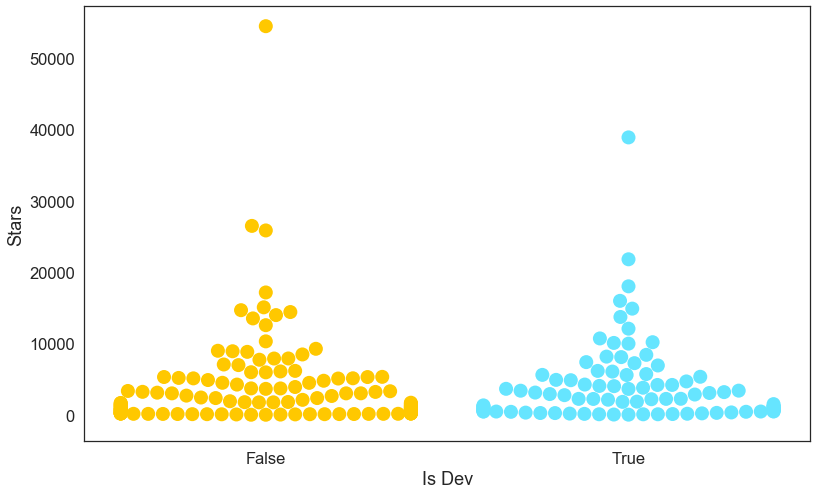

In [45]:
starsdev_df = stars_df.dropna(subset=['is_dev'])
starsdev_df['is_dev'] = starsdev_df['is_dev'].astype(str)

fig = plt.figure(figsize = (13, 8))
#plt.xticks(rotation=90)
sns.set(font_scale = 1.5)
sns.set_style("white")
ax = m_swarmplot(x="is_dev", y="gh_stars", data=starsdev_df)

plt.ylabel("Stars")
plt.xlabel("Is Dev")
#plt.title("Stars / Is Dev", weight='bold')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
#ax.legend(loc='center right', title="Topic is Dev", bbox_to_anchor=(1.25, 0.5), ncol=1)

fig.set_facecolor('#45AFDC00')
ax.set_facecolor('#00000000')

In [46]:
#move on to lines_df

Text(0, 0.5, 'Count')

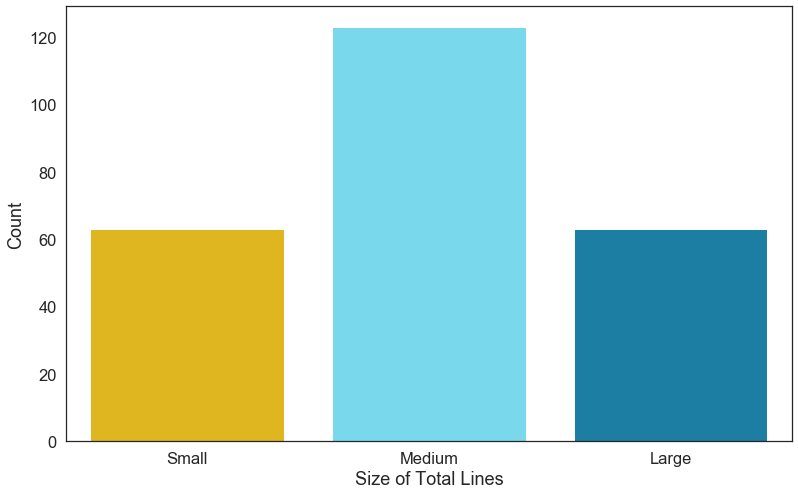

In [47]:
fig = plt.figure(figsize=(13,8))
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.countplot(x='size_TOTAL_lines',data=lines_df, palette=PALETTE, order=['Small', 'Medium', 'Large'])

plt.xlabel("Size of Total Lines")
plt.ylabel("Count")
#plt.title("Size of Total Lines", weight='bold')

#fig.set_facecolor('#45AFDC00')
#ax.set_facecolor('#00000000')

In [48]:
def committer_50(x):
    if x < 2.0:
        return "Yes"
    return "No"

lines_df['committer_dist_50_percent'] = lines_df['committer_percent_dist_50'].apply(committer_50)

In [49]:
#lines_df[lines_df['sloc_TOTAL_lines'] == lines_df['sloc_TOTAL_lines'].max()]

In [50]:
#indexNames = lines_df[lines_df['sloc_TOTAL_lines'] == 11085442.0].index
#lines_df.drop(indexNames , inplace=True)
#lines_df['sloc_TOTAL_lines'] == 11085442.0

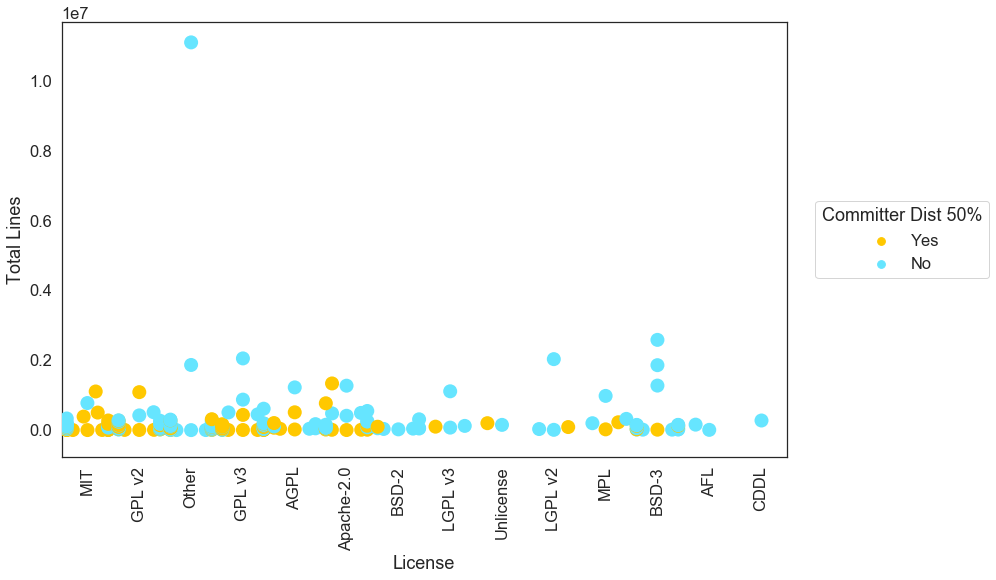

In [51]:
fig = plt.figure(figsize = (13, 8))
plt.xticks(rotation=90)
sns.set(font_scale = 1.5)
sns.set_style("white")
ax = m_swarmplot(x="license", y="sloc_TOTAL_lines", hue = 'committer_dist_50_percent', data=lines_df)

plt.xlabel("License")
plt.ylabel("Total Lines")
#plt.title("Total Lines / License", weight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
ax.legend(loc='center right', title="Committer Dist 50%", bbox_to_anchor=(1.29, 0.5), ncol=1)

fig.set_facecolor('#45AFDC00')
ax.set_facecolor('#00000000')

In [52]:
#move onto containerpkg_df

Text(0, 0.5, '')

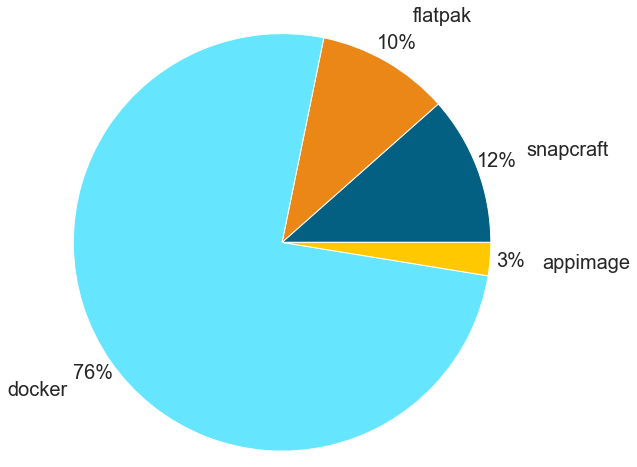

In [53]:
pie = m_pieplot(
    containerpkg_df
    .groupby('pkg_container')
    .count()
    .sort_values('pkg_container', ascending=False))
plt.ylabel("")
#plt.title("Container Technology Breakdown", weight='bold', pad = 40, size=20)

Text(0, 0.5, 'Container Technology')

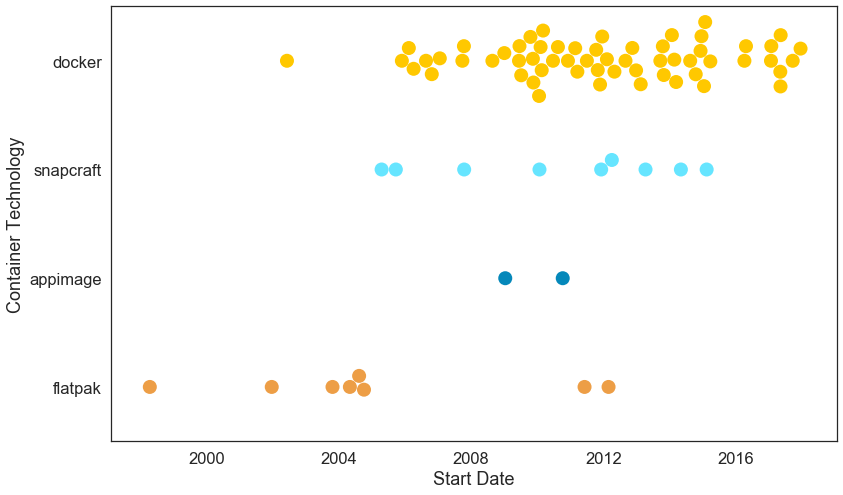

In [54]:
containerpkg_df['first_commit'] = pd.to_datetime(containerpkg_df['first_commit'])

fig = plt.figure(figsize = (13, 8))
sns.set(font_scale = 1.5)
sns.set_style("white")
ax = m_swarmplot(x="first_commit", y="pkg_container", data=containerpkg_df)

plt.xlabel("Start Date")
plt.ylabel("Container Technology")
#plt.title("Start Date / Container Technology", weight='bold')

In [55]:
#move on to freezerpkg_df

Text(0, 0.5, '')

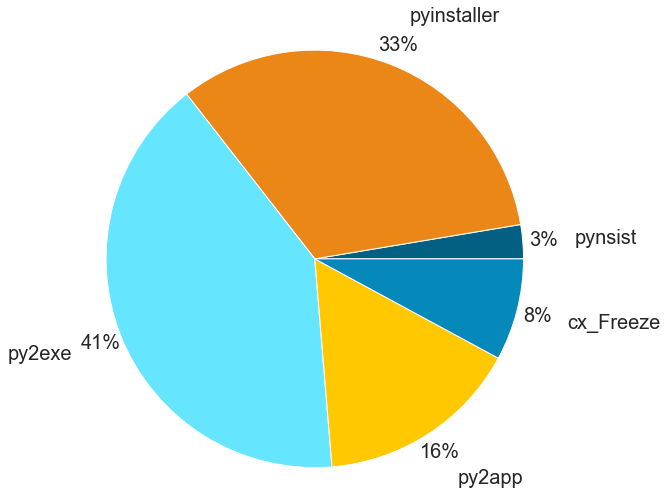

In [56]:
pie = m_pieplot(
    freezerpkg_df
    .groupby('pkg_freezer')
    .count()
    .sort_values('pkg_freezer', ascending=False))
plt.ylabel("")
#plt.title("Freezer Technology Breakdown", weight='bold', pad = 40, size=20)


Text(0, 0.5, 'Freezer Technology')

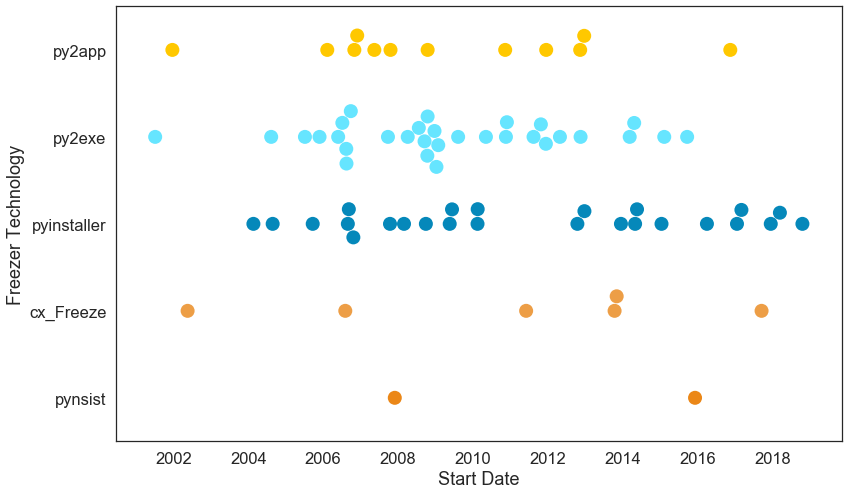

In [57]:
freezerpkg_df['first_commit'] = pd.to_datetime(freezerpkg_df['first_commit'])

fig = plt.figure(figsize = (13, 8))
sns.set(font_scale = 1.5)
sns.set_style("white")
ax = m_swarmplot(x="first_commit", y="pkg_freezer", data=freezerpkg_df)

plt.xlabel("Start Date")
plt.ylabel("Freezer Technology")
#plt.title("Start Date / Freezer Technology", weight='bold')

In [58]:
#move on to looking at arch_type through arch_df

Text(0, 0.5, '')

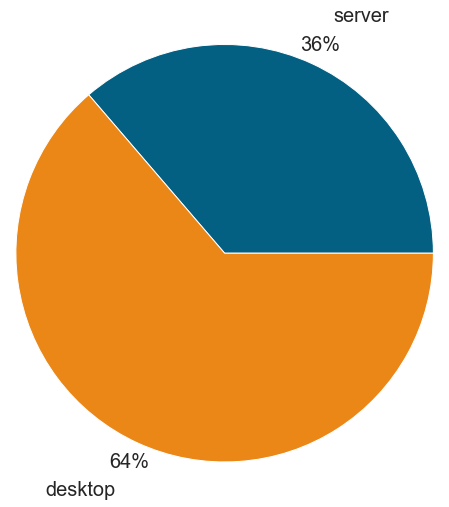

In [59]:
pie = m_pieplot(
    arch_df
    .groupby('arch_type')
    .count()
    .sort_values('arch_type', ascending=False))

#plt.title("Desktop vs Server Breakdown", weight='bold', pad=40, size=20)
plt.ylabel("")

Text(0, 0.5, 'Arch Type')

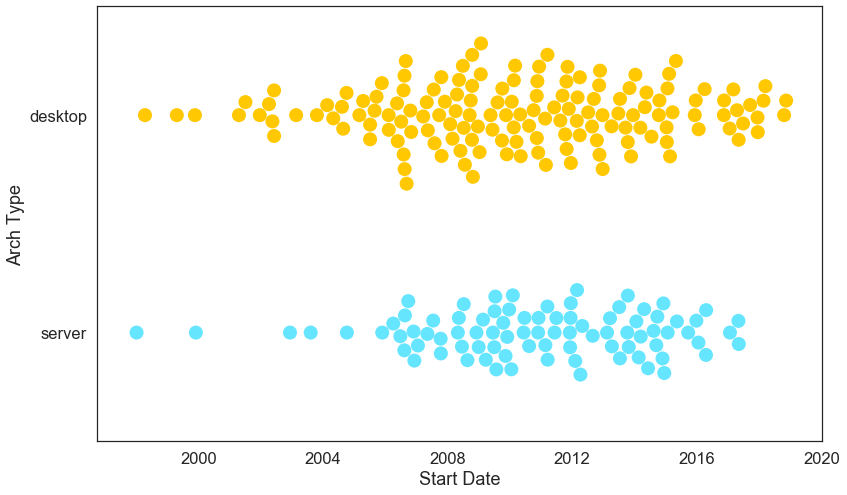

In [60]:
arch_df['first_commit'] = pd.to_datetime(arch_df['first_commit'])
fig = plt.figure(figsize = (13, 8))
sns.set(font_scale = 1.5)
sns.set_style("white")
ax = m_swarmplot(x="first_commit", y="arch_type", data=arch_df)

plt.xlabel("Start Date")
plt.ylabel("Arch Type")
#plt.title("Start Date / Arch Type", weight='bold')

In [61]:
#move on to license_df

In [62]:
def is_topic_dev(x):
    return x.startswith("dev")

license_df['is_dev'] = license_df['topic_primary_fq'].apply(is_topic_dev)

Text(0, 0.5, '')

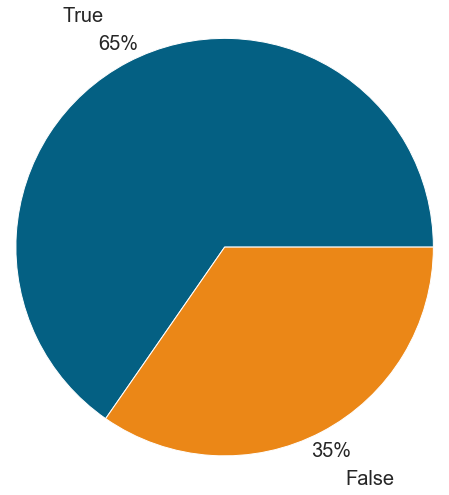

In [63]:
pie = m_pieplot(
    license_df
    .groupby('license_hereditary')
    .count()
    .sort_values('license_hereditary', ascending=False))

#plt.title("Desktop vs Server Breakdown", weight='bold', pad=40, size=20)
plt.ylabel("")

In [64]:
license_df.head()

,name,license_group,license_hereditary,topic_primary_fq,is_dev
0,archivebox,MIT,False,internet,False
1,canto,GPL,True,internet,False
3,gpodder,GPL,True,internet,False
5,neubot,GPL,True,internet,False
6,newsblur,MIT,False,internet,False


Text(0, 0.5, '')

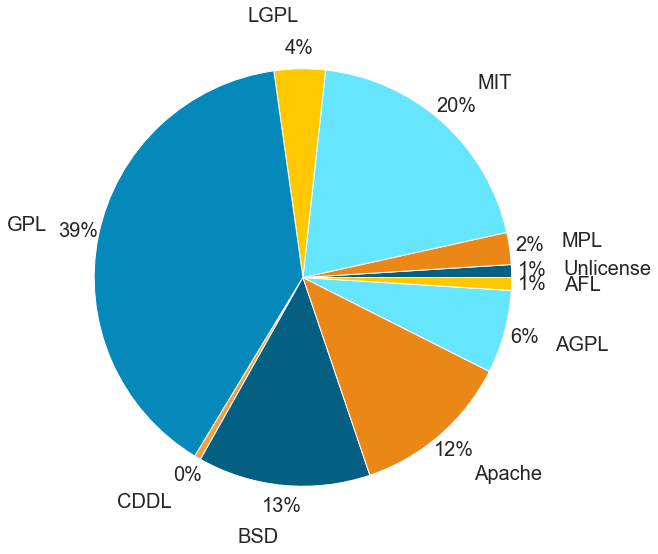

In [65]:
pie = m_pieplot(
    license_df
    .groupby('license_group')
    .count()
    .sort_values('license_group', ascending=False))

#plt.title("Desktop vs Server Breakdown", weight='bold', pad=40, size=20)
plt.ylabel("")

In [66]:
#move on to py3_df

In [67]:
def py_3(x):
    if x <= 3.4:
        return "<3.5+"
    return '%s+' % x

py3_df['py3_type'] = py3_df['py3'].apply(py_3)

Text(0, 0.5, '')

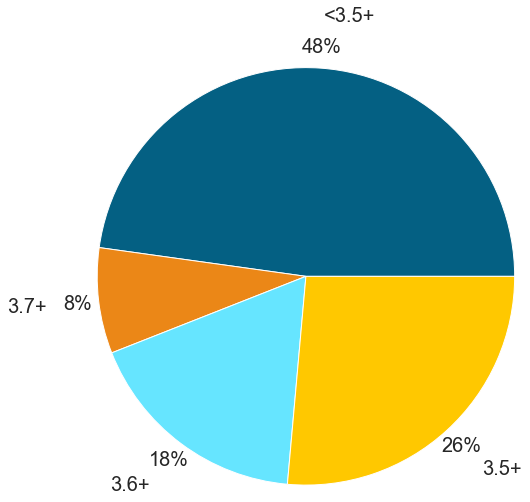

In [68]:
pie = m_pieplot(
    py3_df
    .groupby('py3_type')
    .count()
    .sort_values('py3_type', ascending=False))
#plt.title("Figure 6: Dep Concurrency Breakdown", weight='bold', pad = 40, size=20)
plt.ylabel("")